In [215]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [216]:
data=pd.read_csv(r"C:\Users\gangu\Downloads\house price data.csv")

In [217]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [218]:
data.shape

(4600, 18)

In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [220]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [221]:
data['country'].value_counts()

country
USA    4600
Name: count, dtype: int64

In [222]:
data['statezip'].value_counts()

statezip
WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: count, Length: 77, dtype: int64

In [223]:
data['city'].value_counts()

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific        

In [224]:
data['street'].value_counts()

street
2520 Mulberry Walk NE     4
2500 Mulberry Walk NE     3
9413 34th Ave SW          2
6008 8th Ave NE           2
11034 NE 26th Pl          2
                         ..
1404 Broadmoor Dr E       1
3249 E Ames Lake Dr NE    1
6032 35th Ave NE          1
1006 NE Ravenna Blvd      1
18717 SE 258th St         1
Name: count, Length: 4525, dtype: int64

In [225]:
data['date'].value_counts()

date
2014-06-23 00:00:00    142
2014-06-25 00:00:00    131
2014-06-26 00:00:00    131
2014-07-08 00:00:00    127
2014-07-09 00:00:00    121
                      ... 
2014-06-07 00:00:00      4
2014-07-06 00:00:00      3
2014-07-04 00:00:00      2
2014-05-11 00:00:00      2
2014-05-17 00:00:00      1
Name: count, Length: 70, dtype: int64

In [226]:
encoder=LabelEncoder()

In [227]:
encoder

LabelEncoder()

In [228]:
data['date_label']=encoder.fit_transform(data['date'])
data['date']=data['date_label']
data.drop(columns='date_label',axis='1',inplace=True)

In [229]:
data['street_label']=encoder.fit_transform(data['street'])
data['street']=data['street_label']
data.drop(columns='street_label',axis='1',inplace=True)

In [230]:
data['city_label']=encoder.fit_transform(data['city'])
data['city']=data['city_label']
data.drop(columns='city_label',axis='1',inplace=True)

In [231]:
data['statezip_label']=encoder.fit_transform(data['statezip'])
data['statezip']=data['statezip_label']
data.drop(columns='statezip_label',axis='1',inplace=True)

In [232]:
data['country_label']=encoder.fit_transform(data['country'])
data['country']=data['country_label']
data.drop(columns='country_label',axis='1',inplace=True)

In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   int32  
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   int32  
 15  city           4600 non-null   int32  
 16  statezip       4600 non-null   int32  
 17  country        4600 non-null   int32  
dtypes: float

In [234]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,62,0
1,0,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58,0
2,0,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26,0
3,0,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7,0
4,0,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,31,0


In [235]:
x=data.drop(columns='price')
y=data['price']

In [236]:
x

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,62,0
1,0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58,0
2,0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26,0
3,0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7,0
4,0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,68,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,3447,35,62,0
4596,68,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,960,3,6,0
4597,68,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,4033,32,37,0
4598,69,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,3498,35,71,0


In [237]:
y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [238]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [239]:
x.shape,x_train.shape,x_test.shape

((4600, 17), (3680, 17), (920, 17))

In [240]:
model=LinearRegression()

In [241]:
model.fit(x_train,y_train)

LinearRegression()

In [242]:
train_prediction=model.predict(x_train)
train_error_score=metrics.r2_score(y_train,train_prediction)
train_error_score

0.4155967089429575

In [243]:
test_prediction=model.predict(x_test)
test_error_score=metrics.r2_score(y_test,test_prediction)
test_error_score

0.05716157252661347

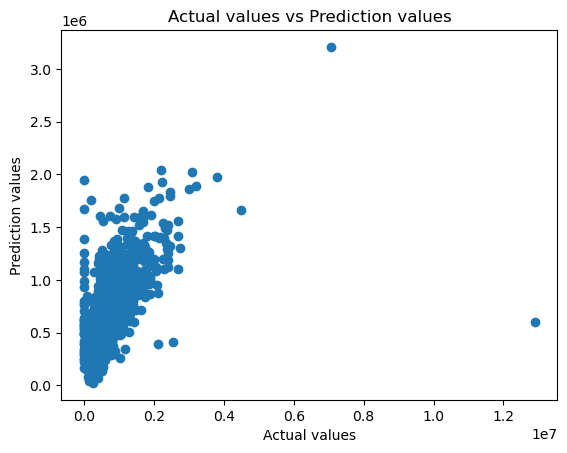

In [244]:
plt.scatter(y_train,train_prediction)
plt.xlabel('Actual values')
plt.ylabel('Prediction values')
plt.title('Actual values vs Prediction values')
plt.show()

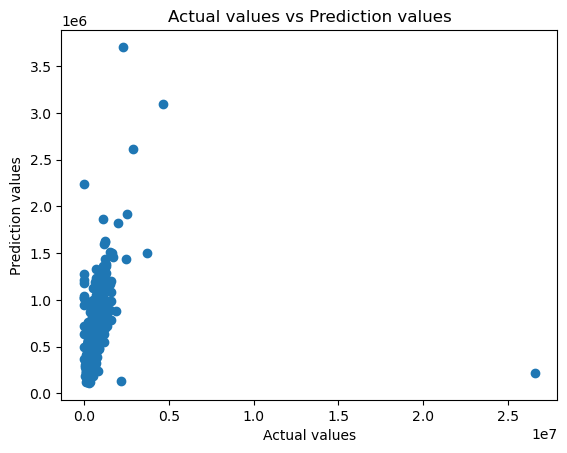

In [245]:
plt.scatter(y_test,test_prediction)
plt.xlabel('Actual values')
plt.ylabel('Prediction values')
plt.title('Actual values vs Prediction values')
plt.show()